In [1]:
import torch
from train import CosineWRExponentialLR, CosineExponentialLR
import matplotlib.pyplot as plt

/blue/arthur.porto-biocosmos/odobon3.gatech/.conda/envs/biocosmos_o/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def init_optimizer_dummy(lr_init):
    dummy_param = torch.nn.Parameter(torch.zeros(1))
    optimizer   = torch.optim.AdamW(
        [dummy_param],
        lr=lr_init,
        betas=(0.9, 0.98),
        eps=1.0e-6,
    )
    return optimizer

In [48]:
n_epochs = 500

In [64]:
lr_init = 1.0e-5

opt  = init_optimizer_dummy(lr_init)
args = {
    "gamma":      0.98,
    "period":     10,
    "peak_ratio": 9.2,
    "lr_nom_min": 9.2e-8,
}
scheduler = CosineWRExponentialLR(opt, **args)

lrs_coswrXexp = []
for epoch in range(n_epochs):
    lrs_coswrXexp.append(opt.param_groups[0]["lr"])
    scheduler.step()

In [77]:
lr_init = 1.112e-5

opt  = init_optimizer_dummy(lr_init)
args = {
    "gamma":      0.98,
    "period":     10,
    "peak_ratio": 10,
    "lr_nom_min": 1.0e-7,
}
scheduler  = CosineExponentialLR(opt, **args)

lrs_cosXexp = []
for epoch in range(n_epochs):
    lrs_cosXexp.append(opt.param_groups[0]["lr"])
    scheduler.step()

sum(coswrXexp) ---------- 0.00032033
sum(cosXexp) ------------ 0.00032047
sum(coswrXexp) (flat) --- 0.00001378
sum(cosXexp) (flat) ----- 0.00001375


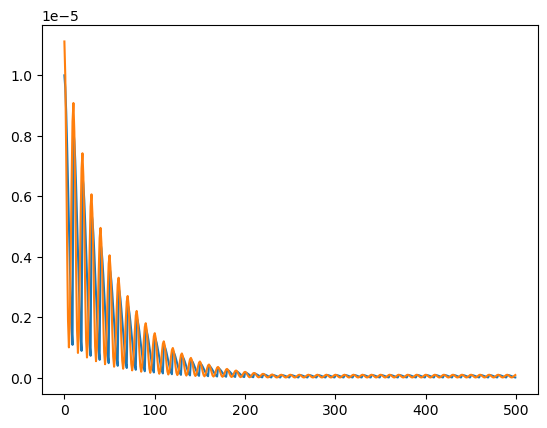

In [78]:
flat_region_start = 250

print(f"sum(coswrXexp) ---------- {sum(lrs_coswrXexp):.8f}")
print(f"sum(cosXexp) ------------ {sum(lrs_cosXexp):.8f}")
print(f"sum(coswrXexp) (flat) --- {sum(lrs_coswrXexp[flat_region_start:]):.8f}")
print(f"sum(cosXexp) (flat) ----- {sum(lrs_cosXexp[flat_region_start:]):.8f}")

plt.plot(lrs_coswrXexp)
plt.plot(lrs_cosXexp)